In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 8.9 MB/s 
     |████████████████████████████████| 163 kB 59.2 MB/s 
     |████████████████████████████████| 7.6 MB 48.0 MB/s 


In [ ]:
import transformers
from transformers import BertModel, BertTokenizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
bert = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Omdena/AI for soft skills/Dummy_data_soft_skills_v2.csv')
df

,Title,Content
0,listening,Listening is one of the most important aspects...
1,listening,Empathy is the ability to understand the feeli...
2,listening,The way to improve your listening skills is to...
3,listening,Listening is the ability to accurately receive...
4,listening,Empathy is the ability to understand the feeli...
5,speaking,"Conversation is the basis of communication, an..."
6,speaking,Communication begins with you. \nTake responsi...
7,speaking,Think before you speak. \nMost of us work best...
8,speaking,"As you formulate a speech strategy, put yourse..."
9,non-verbal communication,"When we talk about things that matter to us, t..."


In [ ]:
paras = df['Content']

In [ ]:
para_vectors = []
for par in paras:
  encoding = tokenizer.encode_plus(
      par,
      add_special_tokens = True,
      max_length = 500,
      truncation = True,
      return_attention_mask = True,
      return_tensors = 'pt'
  )

  input_ids = encoding['input_ids']
  attention_mask = encoding['attention_mask']

  with torch.no_grad():
    output = bert(input_ids, attention_mask)
    hidden_states = output['hidden_states']    # Get BERT's 12 output values

     # A simple approach for generating the whole paragraph embedding
    # is to average the second to last hiden layer of each token producing a single 768 length vector.

    token_vecs = hidden_states[-2][0]
    # Calculate the average of all token vectors of the current paragraph.
    para_embed = torch.mean(token_vecs, dim = 0)

    para_vectors.append(para_embed.tolist())



In [ ]:
print(len(para_vectors))

51


In [ ]:
df['Vectors'] = para_vectors
df.head()

,Title,Content,Vectors
0,listening,Listening is one of the most important aspects...,"[-0.2737334668636322, 0.322644978761673, 0.075..."
1,listening,Empathy is the ability to understand the feeli...,"[-0.284487247467041, 0.37035679817199707, -0.0..."
2,listening,The way to improve your listening skills is to...,"[-0.2599110007286072, 0.2073851227760315, -0.1..."
3,listening,Listening is the ability to accurately receive...,"[-0.21176564693450928, 0.2908611297607422, 0.2..."
4,listening,Empathy is the ability to understand the feeli...,"[-0.18868641555309296, 0.3538167178630829, -0...."


**Clustering using Kmeans**

In [ ]:
num_skill_labels = len(df['Title'].unique())
num_skill_labels

10

In [ ]:
sum_squared_dist = []
silh_scores = []
K = range(2, num_skill_labels)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(para_vectors)
  sum_squared_dist.append(km.inertia_)
  score = silhouette_score(para_vectors, km.labels_)
  silh_scores.append(score)

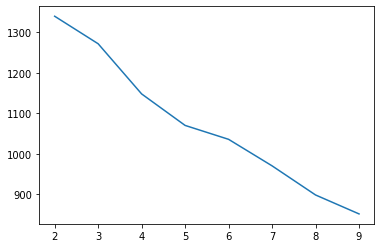

In [ ]:
plt.plot(K, sum_squared_dist)
plt.show()

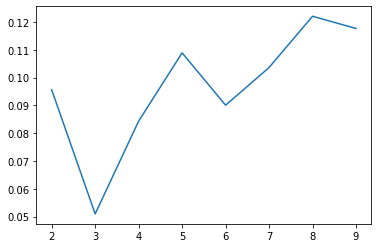

In [ ]:
plt.plot(K, silh_scores)
plt.show()

In [ ]:
true_K = 8
model = KMeans(n_clusters = k)
model.fit(para_vectors)
labels = model.labels_

df['Clusters'] = labels
df

,Title,Content,Vectors,Clusters
0,listening,Listening is one of the most important aspects...,"[-0.2737334668636322, 0.322644978761673, 0.075...",4
1,listening,Empathy is the ability to understand the feeli...,"[-0.284487247467041, 0.37035679817199707, -0.0...",8
2,listening,The way to improve your listening skills is to...,"[-0.2599110007286072, 0.2073851227760315, -0.1...",1
3,listening,Listening is the ability to accurately receive...,"[-0.21176564693450928, 0.2908611297607422, 0.2...",1
4,listening,Empathy is the ability to understand the feeli...,"[-0.18868641555309296, 0.3538167178630829, -0....",8
5,speaking,"Conversation is the basis of communication, an...","[-0.47373342514038086, 0.029185360297560692, 0...",4
6,speaking,Communication begins with you. \nTake responsi...,"[0.04293554276227951, 0.2817416191101074, -0.0...",1
7,speaking,Think before you speak. \nMost of us work best...,"[-0.21332143247127533, 0.03413750231266022, -0...",4
8,speaking,"As you formulate a speech strategy, put yourse...","[-0.1840415894985199, -0.06368409842252731, 0....",4
9,non-verbal communication,"When we talk about things that matter to us, t...","[-0.0588030144572258, 0.5930303335189819, 0.35...",4


**Clustering using DBScan**

In [ ]:
dbsc = DBSCAN(eps = 3, min_samples = 4)
dbsc.fit(np.array(para_vectors))

DBSCAN(eps=3, min_samples=4)

In [ ]:
dblabels = dbsc.labels_
dblabels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])